In [1]:
from databaseCommunication import readDatabaseFile, createDataFrame_list
from dataframeFormating import createLabeledDataFrame_list #, N_polarized_pure3b, N_polarized, N_linear, getReducedDataframe, getReducedResults, 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
label_heads = ['latticeDetuning']
labels = [[['-40'], [137626, 137796]],
          [['-40'], [137811, 138038]]
                 ]

labels_TOF = [[['-40'], [138053, 138136]]
                 ]

excluded = []

In [3]:
"""ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth', 'ODT3_Comp', 'Y_rotation']
fitVariables = ['nCount', 'xWidth', 'yWidth']

df = createLabeledDataFrame_list(labels, label_heads, ciceroVariables, fitVariables)
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
    except:
        pass
df['Y_rotation'] = df['Y_rotation'].astype(bool)
df.to_pickle('data_save_210423.pickle')

df_TOF = createLabeledDataFrame_list(labels_TOF, label_heads, ciceroVariables, fitVariables)
for column in df.columns:
    try:
        df_TOF[column] = df_TOF[column].astype(float)
    except:
        pass
df_TOF['Y_rotation'] = df_TOF['Y_rotation'].astype(bool)
df_TOF.to_pickle('data_save_210423_TOF.pickle')"""

"ciceroVariables = ['BECHoldTime', 'TOF', 'latticeDepth', 'ODT3_Comp', 'Y_rotation']\nfitVariables = ['nCount', 'xWidth', 'yWidth']\n\ndf = createLabeledDataFrame_list(labels, label_heads, ciceroVariables, fitVariables)\nfor column in df.columns:\n    try:\n        df[column] = df[column].astype(float)\n    except:\n        pass\ndf['Y_rotation'] = df['Y_rotation'].astype(bool)\ndf.to_pickle('data_save_210423.pickle')\n\ndf_TOF = createLabeledDataFrame_list(labels_TOF, label_heads, ciceroVariables, fitVariables)\nfor column in df.columns:\n    try:\n        df_TOF[column] = df_TOF[column].astype(float)\n    except:\n        pass\ndf_TOF['Y_rotation'] = df_TOF['Y_rotation'].astype(bool)\ndf_TOF.to_pickle('data_save_210423_TOF.pickle')"

In [4]:
df = pd.read_pickle('data_save_210423.pickle')
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df['imageID'].isin(excluded))[0])
df.drop(indexNames, inplace = True)

df_TOF = pd.read_pickle('data_save_210423_TOF.pickle')
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df_TOF['imageID'].isin(excluded))[0])
df_TOF.drop(indexNames, inplace = True)

In [5]:
df_TOF

,BECHoldTime,TOF,latticeDepth,ODT3_Comp,Y_rotation,nCount,xWidth,yWidth,imageID,latticeDetuning
0,10.0,5.0,0.05,0.0,False,99721.0,10.11620,9.84420,138053.0,-40.0
1,10.0,5.0,0.05,0.0,False,101548.0,10.86900,10.17210,138054.0,-40.0
2,10.0,6.0,0.05,0.0,False,93918.0,10.86110,11.34220,138055.0,-40.0
3,10.0,7.0,0.05,0.0,False,79999.0,12.17970,12.44540,138056.0,-40.0
4,10.0,3.0,0.05,0.0,False,73763.0,8.77817,8.19221,138057.0,-40.0
...,...,...,...,...,...,...,...,...,...,...
79,10.0,4.0,1.90,0.0,False,101931.0,18.66980,11.34270,138132.0,-40.0
80,10.0,6.0,1.90,0.0,False,92888.0,29.47930,15.26090,138133.0,-40.0
81,10.0,5.0,1.90,0.0,False,78154.0,23.39660,11.30280,138134.0,-40.0
82,10.0,3.0,1.90,0.0,False,67024.0,15.46930,9.18807,138135.0,-40.0


In [6]:
latticeDepthList = df['latticeDepth'].unique()
Y_rotationList = df['Y_rotation'].unique()
BECHoldTimeList = df['BECHoldTime'].unique()
latticeDetuningList = df['latticeDetuning'].unique()

In [7]:
np.sort(BECHoldTimeList)

array([   0.,    2.,    4.,    6.,    8.,   10.,   12.,   15.,   20.,
         40.,   60.,   80.,  100.,  200.,  300.,  400.,  600.,  800.,
       1000.])

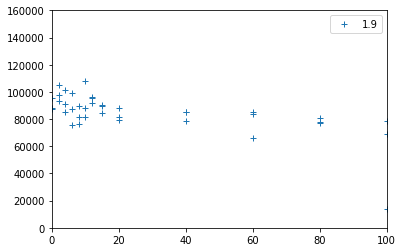

In [8]:
def getRun(df, latticeDepth, Y_rotation = False, latticeDetuning = 25):
    df_temp = df[df['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['Y_rotation'] == Y_rotation]
    df_temp2 = df_temp2[df_temp2['latticeDetuning'] == latticeDetuning]
    return df_temp

plt.figure()
for latticeDepth in [1.9]:
    df_temp = getRun(df, latticeDepth, latticeDetuning = 25)
    plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '+', label = str(round(latticeDepth, 2)))
plt.legend()
plt.ylim(0, 160000)
plt.xlim(0,100)
plt.show()

In [9]:
results = []
results_pure = []
results_lin = []


from scipy.optimize import curve_fit

def N_polarized(t, N0, alpha, gamma):
    return np.sqrt(alpha / (np.exp(2*alpha*t)*(alpha/(N0**2)+gamma)-gamma))

def N_linear(t, N0, b):
    return N0-b*t

def N_polarized_pure3b(t, N0, gamma):
    return N0 / np.sqrt(1+N0**2*gamma*t)

def fitRun(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    alpha_guess = 1/time_guess
    gamma_guess = 1/(N0_guess**2*time_guess)
    popt, pcov = curve_fit(N_polarized, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, alpha_guess, gamma_guess],
                          )#bounds = ((N0_guess/10, alpha_guess/10, gamma_guess/100), (N0_guess*10, alpha_guess*10, gamma_guess*100)),
                           #method = 'trf'
                      #)
    return popt, pcov

def fitRun_pure(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    popt, pcov = curve_fit(N_polarized_pure3b, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, 1/(N0_guess**2*time_guess)],
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov

def fitRun_lin(df_run):
    N0_guess = max(df_run['nCount'])
    time_guess = max(df_run['BECHoldTime'])
    popt, pcov = curve_fit(N_linear, df_run['BECHoldTime'], df_run['nCount'],
                       p0 = [N0_guess, N0_guess/time_guess],
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov

for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df, latticeDepth, Y_rotation = False, latticeDetuning = latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            popt, pcov = fitRun(df_run)
            results += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : False,
                            'N0' : popt[0],
                            'alpha' : min(-10**(-10), popt[1]),
                             'gamma' : popt[2]
                        }]
resultsDF = pd.DataFrame(results)

for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df, latticeDepth, Y_rotation = False, latticeDetuning = latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            popt, pcov = fitRun_pure(df_run)
            results_pure += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : False,
                            'N0' : popt[0],
                            'alpha' : 0,
                             'gamma' : popt[1]
                        }]
resultsDF_pure = pd.DataFrame(results_pure)

for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df, latticeDepth, Y_rotation = False, latticeDetuning = latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            popt, pcov = fitRun_lin(df_run[df_run['BECHoldTime']<100])
            results_lin += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : False,
                            'N0' : popt[0],
                             'b' : popt[1]
                        }]
resultsDF_lin = pd.DataFrame(results_lin)

#print('\n')
#print(resultsDF)
#perr = np.sqrt(np.diag(pcov))

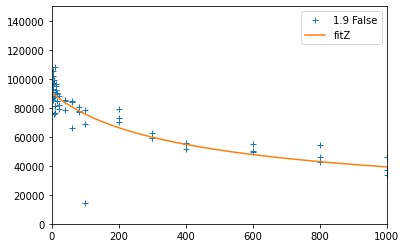

In [11]:
def getResult(dfResult, latticeDepth, Y_rotation, latticeDetuning = 25):
    df_temp = dfResult[dfResult['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['Y_rotation'] == Y_rotation]
    df_temp3 = df_temp2[df_temp2['latticeDetuning'] == latticeDetuning]
    return df_temp3

latticeDepth = 1.9
latticeDetuning = -40

df_tempZ = getRun(df, latticeDepth, False, latticeDetuning)
resultZ = getResult(resultsDF_pure, latticeDepth, False, latticeDetuning)

time = np.linspace(0, 1000, 10000)
NZ, alphaZ, gammaZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4], resultZ.iloc[0, 5]
Z = N_polarized_pure3b(time, NZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
plt.ylim(0, 150000)
plt.xlim(0,1000)
plt.show()

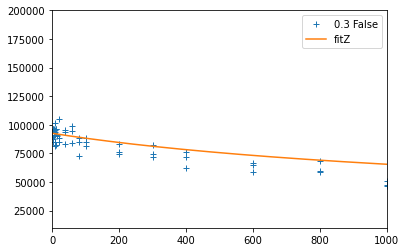

In [12]:
latticeDepth = 0.3
latticeDetuning = -40

df_tempZ = getRun(df, latticeDepth, False, latticeDetuning)
resultZ = getResult(resultsDF, latticeDepth, False, latticeDetuning)

time = np.linspace(0, 1000, 10000)
NZ, alphaZ, gammaZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4], resultZ.iloc[0, 5]

Z = N_polarized(time, NZ, alphaZ, gammaZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
plt.ylim(10000,200000)
plt.xlim(0,1000)
plt.show()

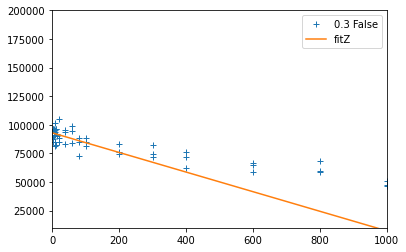

In [13]:
latticeDepth = 0.3
latticeDetuning = -40

df_tempZ = getRun(df, latticeDepth, False, latticeDetuning)
resultZ = getResult(resultsDF_lin, latticeDepth, False, latticeDetuning)

time = np.linspace(0, 1000, 10000)
NZ, bZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4]

Z = N_linear(time, NZ, bZ)

plt.figure()
plt.plot(df_tempZ['BECHoldTime'], df_tempZ['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(False))
plt.plot(time, Z, '-', label = 'fitZ')
plt.legend()
plt.ylim(10000,200000)
plt.xlim(0,1000)
plt.show()

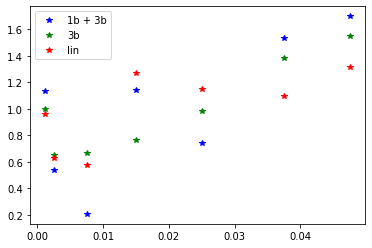

In [14]:
resultsDF_Z = resultsDF[resultsDF['Y_rotation'] == False]
resultsDF_Z_pure = resultsDF_pure[resultsDF_pure['Y_rotation'] == False]
resultsDF_Z_lin = resultsDF_lin[resultsDF_lin['Y_rotation'] == False]

latticeDepth = -resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning']
decay_1b3b = resultsDF_Z['gamma']/resultsDF_Z['gamma'].mean()
decay_3b = resultsDF_Z_pure['gamma']/resultsDF_Z_pure['gamma'].mean()
decay_lin = resultsDF_Z_lin['b']/resultsDF_Z_lin['b'].mean()

plt.figure()
plt.plot(latticeDepth, decay_1b3b, 'b*', label = '1b + 3b')
plt.plot(latticeDepth, decay_3b, 'g*', label = '3b')
plt.plot(latticeDepth, decay_lin, 'r*', label = 'lin')

plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

The increase in power should result in a smaller cloud. The density is proportional to $n\sim 1/(a_{oh}r_{\perp}^{2}) \sim \sqrt{\omega_{z}}\frac{\omega_{\perp}^{2}}{\mu}$. Assuming the chemical potential constant, the density $n$ goes like $(P/\Delta)^{5/4}$. In that case the decay coefficient which is proportional to $n^{2}$ should be scalled accordingly.
If we rather fix the scattering length $a$ and write $\mu\sim na$ then at constant $a$ it gives $n \sim (P/\Delta)^{5/8})$.

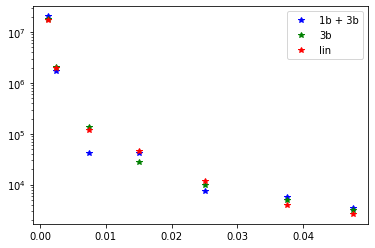

In [15]:
resultsDF_Z = resultsDF[resultsDF['Y_rotation'] == False]
resultsDF_Z_pure = resultsDF_pure[resultsDF_pure['Y_rotation'] == False]
resultsDF_Z_lin = resultsDF_lin[resultsDF_lin['Y_rotation'] == False]

latticeDensity = -resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning']
decay_1b3b = resultsDF_Z['gamma']/resultsDF_Z['gamma'].mean()/latticeDensity**(5/2)
decay_3b = resultsDF_Z_pure['gamma']/resultsDF_Z_pure['gamma'].mean()/latticeDensity**(5/2)
decay_lin = resultsDF_Z_lin['b']/resultsDF_Z_lin['b'].mean()/latticeDensity**(5/2)

plt.figure()
plt.semilogy(latticeDensity, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(latticeDensity, decay_3b, 'g*', label = '3b')
plt.semilogy(latticeDensity, decay_lin, 'r*', label = 'lin')

plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

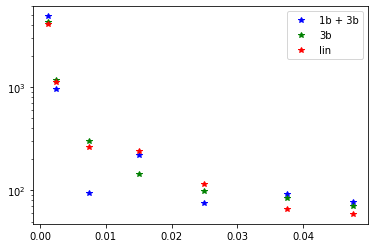

In [16]:
resultsDF_Z = resultsDF[resultsDF['Y_rotation'] == False]
resultsDF_Z_pure = resultsDF_pure[resultsDF_pure['Y_rotation'] == False]
resultsDF_Z_lin = resultsDF_lin[resultsDF_lin['Y_rotation'] == False]

latticeDensity = -resultsDF_Z['latticeDepth']/resultsDF_Z['latticeDetuning']
decay_1b3b = resultsDF_Z['gamma']/resultsDF_Z['gamma'].mean()/latticeDensity**(5/4)
decay_3b = resultsDF_Z_pure['gamma']/resultsDF_Z_pure['gamma'].mean()/latticeDensity**(5/4)
decay_lin = resultsDF_Z_lin['b']/resultsDF_Z_lin['b'].mean()/latticeDensity**(5/4)

plt.figure()
plt.semilogy(latticeDensity, decay_1b3b, 'b*', label = '1b + 3b')
plt.semilogy(latticeDensity, decay_3b, 'g*', label = '3b')
plt.semilogy(latticeDensity, decay_lin, 'r*', label = 'lin')

plt.legend()
#plt.ylim(0,0.2*10**(-11))
plt.show()

Now let's look at the TOF series

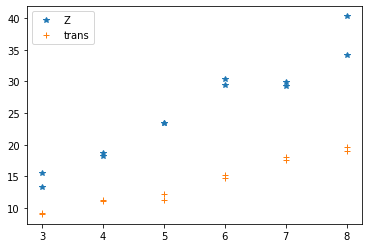

In [17]:
df_TOF
latticeDepthList_TOF = df_TOF['latticeDepth'].unique()

plt.figure()
for latticeDepth in latticeDepthList_TOF[-1:]:
    df_run = getRun(df_TOF, latticeDepth, False, -40)
    plt.plot(df_run['TOF'], df_run['xWidth'], '*', label = 'Z')
    plt.plot(df_run['TOF'], df_run['yWidth'], '+', label = 'trans')
plt.legend()
plt.show()

In [93]:
def sigma(t, sigma0, v):
    return np.sqrt(sigma0**2+(v*t)**2)

def fitRun_sigma(df_run, XorY = 'xWidth'):
    sigma0_guess = df_run[XorY].min()
    v_guess = df_run[XorY].max()/df_run['TOF'].max()
    popt, pcov = curve_fit(sigma, df_run['TOF'], df_run[XorY],
                       p0 = [sigma0_guess, v_guess]
                          )#bounds = ((0, 0), (np.inf, np.inf)),
                           #method = 'trf'
                      #)
    return popt, pcov

results_sigma = []
for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        df_run = getRun(df_TOF, latticeDepth, Y_rotation = False, latticeDetuning = latticeDetuning)
        #print(latticeDetuning, latticeDepth)
        if not df_run.empty:
            popt_Z, pcov_Z = fitRun_sigma(df_run, 'xWidth')
            popt_trans, pcov_trans = fitRun_sigma(df_run, 'yWidth')
            results_sigma += [{'latticeDetuning' : latticeDetuning,
                             'latticeDepth' : latticeDepth,
                             'Y_rotation' : False,
                            'sigma0_Z' : popt_Z[0],
                            'v_Z' : popt_Z[1],
                            'sigma0_trans' : popt_trans[0],
                            'v_trans' : popt_trans[1],
                        }]
resultsDF_sigma = pd.DataFrame(results_sigma)

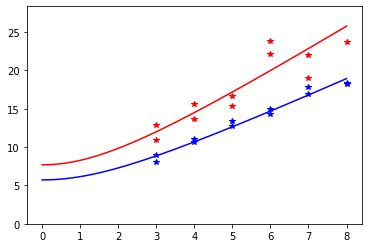

In [101]:
latticeDetuning = -40
latticeDepth = 1

tof = np.linspace(0, 8, 100)
df_run = getRun(df_TOF, latticeDepth, False, latticeDetuning)
df_res = getResult(resultsDF_sigma, latticeDepth, False, latticeDetuning)
sigma0_Z, v_Z, sigma0_trans, v_trans = df_res.iloc[0,3:7]
#sigma0_Z, v_Z = 8, 4
sigma_Z_fit = sigma(tof, sigma0_Z, v_Z)
sigma_trans_fit = sigma(tof, sigma0_trans, v_trans)

plt.figure()
plt.plot(tof, sigma_Z_fit, 'r-')
plt.plot(tof, sigma_trans_fit, 'b-')
plt.plot(df_run['TOF'], df_run['xWidth'], 'r*')
plt.plot(df_run['TOF'], df_run['yWidth'], 'b*')
plt.ylim(0,1.1*max(sigma_Z_fit))
plt.show()

In [106]:
resultsDF_sigma

,latticeDetuning,latticeDepth,Y_rotation,sigma0_Z,v_Z,sigma0_trans,v_trans
0,-40.0,0.05,False,7.196634,1.440443,6.389091,1.635373
1,-40.0,0.10,False,7.133349,1.509937,5.159898,1.965852
2,-40.0,0.30,False,7.238850,2.001895,4.765129,2.322938
3,-40.0,0.60,False,7.146196,2.489011,5.211900,2.201036
4,-40.0,1.00,False,7.679175,3.072614,5.716990,2.254469
5,-40.0,1.50,False,8.639873,3.770987,3.707434,2.544283
6,-40.0,1.90,False,5.216405,4.528457,5.616887,2.322469


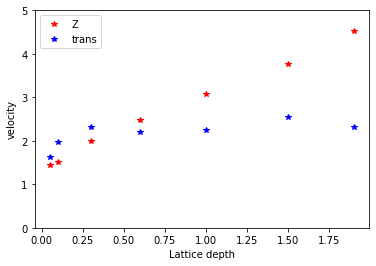

In [105]:
plt.figure()
plt.plot(resultsDF_sigma['latticeDepth'], resultsDF_sigma['v_Z'], 'r*', label = 'Z')
plt.plot(resultsDF_sigma['latticeDepth'], resultsDF_sigma['v_trans'], 'b*', label = 'trans')
plt.legend()
plt.ylim(0, 5)
plt.ylabel("velocity")
plt.xlabel("Lattice depth")
plt.show()

Calculate the velocity to temperature conversion. Here $\sigma = \sqrt{\sigma_0^{2}+(\sigma_{v}t)^{2}}$ is fitted from a gaussian distribution $\exp(-\frac{1}{2}\frac{x^{2}}{\sigma^{2}})$ where $x = vt$, so $v$ is distributed like a gaussian with width $\sigma_{v}$ which is the result of the fit $P(v) \sim \exp(-\frac{1}{2}\frac{v^{2}}{\sigma_{v}^{2}}) \sim \exp(-\frac{\frac{1}{2}mv^{2}}{k_{B}T})$. Therefore we find:
\[ \sigma_{v} = \sqrt{\frac{k_{B}T}{m}}\]

In [110]:
m_Dy = 164*1.66*10**(-27)
k_B = 1.38*10**(-23)
pixel_size = 3.45*10**(-6)
tof_unit = 10**(-3)
magnification = 3
resultsDF_sigma['temperature_Z'] = m_Dy*(resultsDF_sigma['v_Z']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma['temperature_trans'] = m_Dy*(resultsDF_sigma['v_trans']*pixel_size/magnification/tof_unit)**2/k_B
resultsDF_sigma

,latticeDetuning,latticeDepth,Y_rotation,sigma0_Z,v_Z,sigma0_trans,v_trans,temperature_Z,temperature_trans
0,-40.0,0.05,False,7.196634,1.440443,6.389091,1.635373,5.413280e-08,6.977534e-08
1,-40.0,0.10,False,7.133349,1.509937,5.159898,1.965852,5.948206e-08,1.008254e-07
2,-40.0,0.30,False,7.238850,2.001895,4.765129,2.322938,1.045565e-07,1.407810e-07
3,-40.0,0.60,False,7.146196,2.489011,5.211900,2.201036,1.616301e-07,1.263929e-07
4,-40.0,1.00,False,7.679175,3.072614,5.716990,2.254469,2.463114e-07,1.326041e-07
5,-40.0,1.50,False,8.639873,3.770987,3.707434,2.544283,3.710039e-07,1.688882e-07
6,-40.0,1.90,False,5.216405,4.528457,5.616887,2.322469,5.350189e-07,1.407241e-07
